# project about NBA stat #4
https://www.kaggle.com/datasets/mharvnek/nba-team-stats-00-to-18 

מגישים- איתן מוצפי, יונתן סלוצקי, שי דוידוביץ ויאיר בר חי

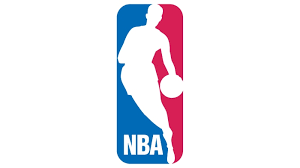

## יבוא הקובץ

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

In [2]:
url='https://github.com/eytanmuzafi/data-science/raw/main/nba_team_stats_00_to_21.csv'
nba_stat= pd.read_csv(url)

## בדיקת בעיות וחריגות בדאטה

In [3]:
nba_stat.isnull().sum()

teamstatspk    0
TEAM           0
GP             0
W              0
L              0
WIN%           0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
TOV            0
STL            0
BLK            0
BLKA           0
PF             0
PFD            0
+/-            0
SEASON         0
dtype: int64

In [4]:
nba_stat.dtypes

teamstatspk      int64
TEAM            object
GP               int64
W                int64
L                int64
WIN%           float64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3PM            float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
TOV            float64
STL            float64
BLK            float64
BLKA           float64
PF             float64
PFD            float64
+/-            float64
SEASON          object
dtype: object

SEASON היא אובייקט.

נעדיף לא לשנות אותו לסוג דייט טיים כדי להשאיר את זה בצורה הזאת, כי עונה מתפרסת על שני חצאי שנה ולא על שנה מלאה.

In [5]:
len(nba_stat)

626

## בדיקת מספר הקבוצות

ראינו שמספר השורות לא מתחלק בשלושים, וידוע לנו שבכל עונה צריכות להיות שלושים קבוצות.

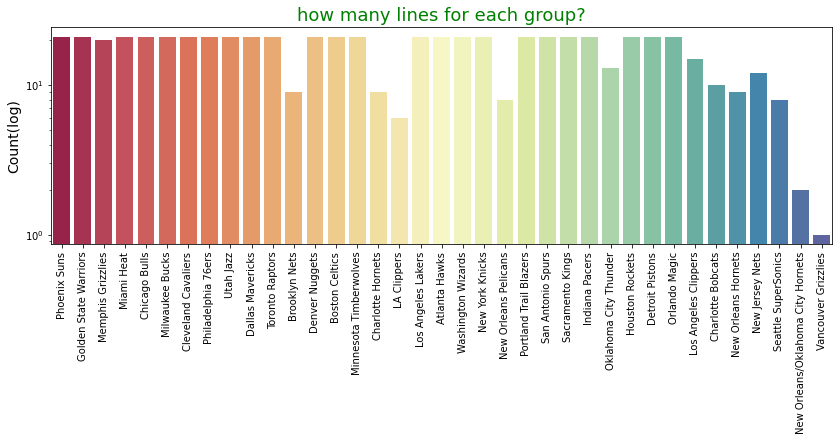

In [6]:
plt.figure(figsize=(14,4)) 
ax=sns.countplot( x = 'TEAM', data = nba_stat,palette="Spectral")
ax.set_yscale("log")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Count(log)",fontsize=14)
ax.set_xlabel("")
ax.set_title("how many lines for each group?",color='green',fontsize=18);

ידוע לנו שמספר הקבוצות צריך להיות 30. יש קבוצות שהחליפו את שמם, אז נשנה בהתאם.

In [7]:
nba_stat.set_index('TEAM', inplace=True)
nba_stat.rename(index = {"LA Clippers": "Los Angeles Clippers",
                     "Seattle SuperSonics":"Oklahoma City Thunder","New Jersey Nets": "Brooklyn Nets",
                     "Charlotte Bobcats":"Charlotte Hornets","New Orleans Hornets": "New Orleans Pelicans","New Orleans/Oklahoma City Hornets": "New Orleans Pelicans"},
                                 inplace = True)

In [8]:
nba_stat=nba_stat.reset_index()

In [9]:
len(nba_stat.TEAM.unique())

31

בדקנו באינטרנט ומצאנו-
שארלוט הצטרפה בעונת  2004-5 והחליפה את ונקובר ולכן המספר לא מתחלק בשלושים.
לכן נוריד את העונות עד שהיא הצטרפה.


In [10]:
nba_stat=nba_stat[nba_stat['SEASON']>='2004-05'].copy()
len(nba_stat)

510

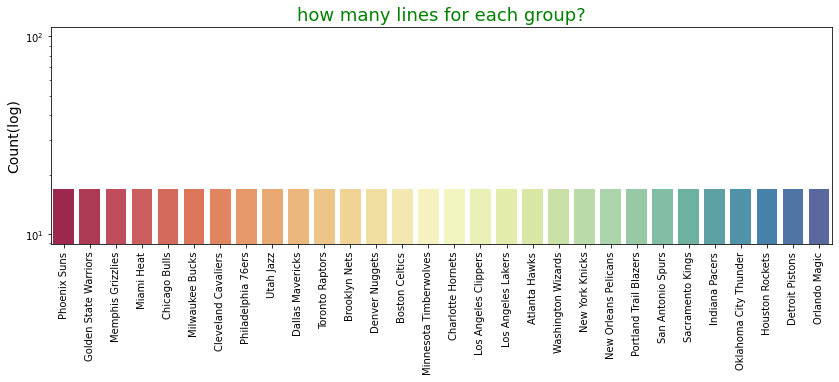

In [11]:
plt.figure(figsize=(14,4)) 
ax=sns.countplot( x = 'TEAM', data = nba_stat,palette="Spectral")
ax.set_yscale("log")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Count(log)",fontsize=14)
ax.set_xlabel("")
ax.set_title("how many lines for each group?",color='green',fontsize=18);

## סידור עמודות ובדיקת חריגות

חסרה עמודה של קליעות לשתיים. ניצור אחת כזאת כדי שיהיה יותר נוח ונוריד עמודות מיותרות.

In [12]:
nba_stat['FGM']=nba_stat['FGM']-nba_stat['3PM']
nba_stat['FGA']=nba_stat['FGA']-nba_stat['3PA']
nba_stat = nba_stat.rename(columns={'FGM':'2PM','FGA':'2PA'})
nba_stat['FG%']=nba_stat['2PM']/nba_stat['2PA']
nba_stat = nba_stat.rename(columns={'FG%':'2P%'})

In [13]:
nba_stat.drop(labels='teamstatspk',axis=1,inplace=True)

In [14]:
nba_stat=nba_stat.copy()
nba_stat['End_place']=0
num=1
for row in range(len(nba_stat)):
    if num<=30:
        nba_stat['End_place'].iloc[row]=num
        num+=1
    if num>30:
        num=1

C:\Users\owner\AppData\Local\Temp\ipykernel_20248\3881535202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_stat['End_place'].iloc[row]=num


In [15]:
nba_stat.columns

Index(['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', '2PM', '2PA', '2P%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'SEASON', 'End_place'],
      dtype='object')

נבדוק אם יש חריגות בתחומים בכל קטגוריה

In [16]:
features = ['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-','End_place']
melted_nba_stat= pd.melt(nba_stat[features], id_vars = 'TEAM', value_vars = features)

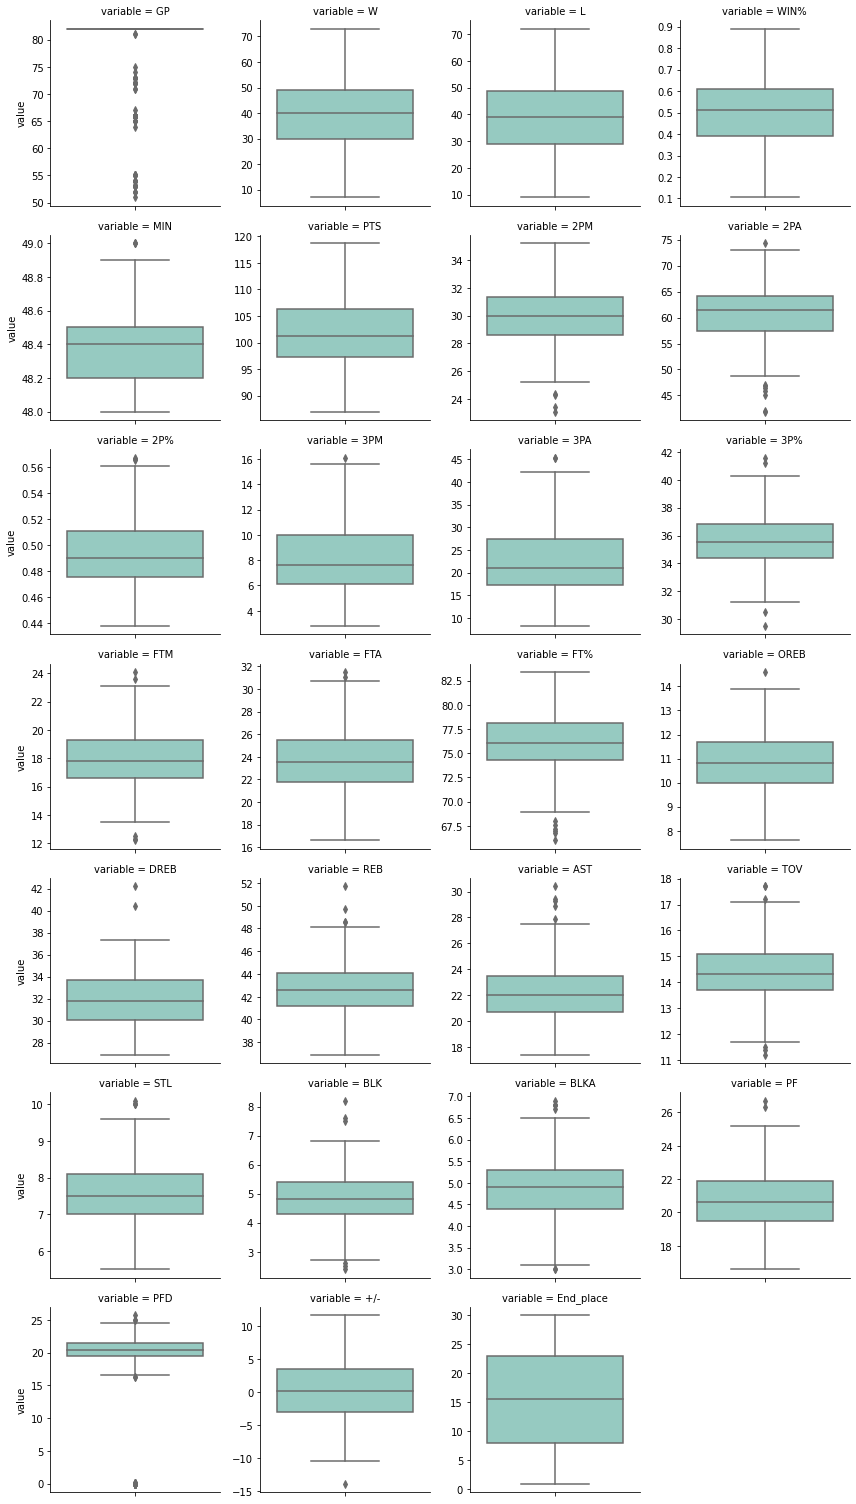

In [17]:
ans = sns.FacetGrid(data = melted_nba_stat, col="variable",  col_wrap=4,sharey=False)
ans.map_dataframe(sns.boxplot, y = 'value',palette='Set3');

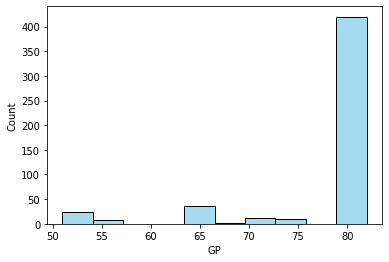

In [18]:
sns.histplot( x = 'GP', data = nba_stat,color='skyblue');

במדד זה קיימת חריגה בגלל שבעונה האחרונה שוחקו פחות משחקים בגלל הקורונה. לכן בכל החישובים נעשה בדיקה לפי אחוזי נצחונות

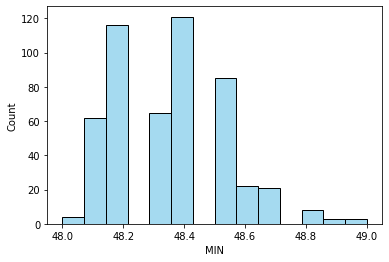

In [19]:
sns.histplot( x = 'MIN', data = nba_stat ,color='skyblue');

למרות שיש בכל משחק 48 דקות, יש משחקים עם יותר בגלל הארכות וזה גם כן בסדר.

נוריד את שתיהן כי אין בהן נתונים מעניינים

In [20]:
nba_stat.drop(labels=['MIN','GP'],axis=1,inplace=True)

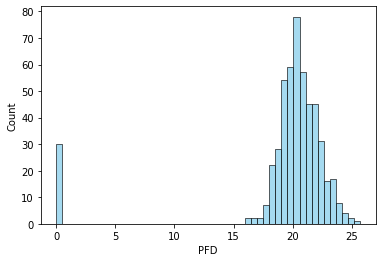

In [21]:
sns.histplot( x = 'PFD', data = nba_stat,color='skyblue');

In [22]:
nba_stat[nba_stat.PFD==0]

,TEAM,W,L,WIN%,PTS,2PM,2PA,2P%,3PM,3PA,...,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON,End_place
480,Phoenix Suns,62,20,0.756,110.4,31.2,60.9,0.512315,9.7,24.7,...,23.5,13.7,7.0,5.5,4.2,19.1,0.0,7.1,2004-05,1
481,Miami Heat,59,23,0.720,101.5,32.0,62.3,0.513644,5.8,15.4,...,21.8,13.7,6.4,5.8,3.2,22.1,0.0,6.5,2004-05,2
482,San Antonio Spurs,59,23,0.720,96.2,29.4,61.7,0.476499,6.2,17.0,...,21.6,13.7,7.5,6.6,5.1,20.9,0.0,7.8,2004-05,3
483,Dallas Mavericks,58,24,0.707,102.5,31.7,66.1,0.479576,5.6,15.5,...,19.6,13.4,8.6,5.6,4.9,22.3,0.0,5.7,2004-05,4
484,Detroit Pistons,54,28,0.659,93.3,30.4,65.5,0.464122,4.4,12.8,...,21.8,13.8,7.0,6.1,4.5,20.0,0.0,3.9,2004-05,5
486,Houston Rockets,51,31,0.622,95.1,28.0,59.8,0.468227,6.7,18.5,...,21.1,13.8,6.9,4.6,4.1,22.0,0.0,4.0,2004-05,7
487,Sacramento Kings,50,32,0.610,103.7,32.7,68.1,0.480176,6.4,17.0,...,24.5,13.1,8.2,3.9,4.5,20.5,0.0,2.2,2004-05,8
490,Boston Celtics,45,37,0.549,101.3,31.8,64.1,0.496100,5.3,15.3,...,22.1,15.8,8.1,5.2,4.9,24.4,0.0,0.9,2004-05,11
491,Memphis Grizzlies,45,37,0.549,93.4,27.7,58.4,0.474315,6.5,18.1,...,20.9,14.6,8.5,5.8,5.8,23.3,0.0,2.3,2004-05,12
492,Washington Wizards,45,37,0.549,100.5,29.9,64.6,0.462848,6.3,18.3,...,19.1,14.3,8.7,4.2,5.0,22.0,0.0,-0.3,2004-05,13


מדובר על עונה אחת. אם נרצה להשתמש בעמודה זו נזכור שיש בה חריגה ונטפל בהתאם לשימוש בה.

In [23]:
nba_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEAM       510 non-null    object 
 1   W          510 non-null    int64  
 2   L          510 non-null    int64  
 3   WIN%       510 non-null    float64
 4   PTS        510 non-null    float64
 5   2PM        510 non-null    float64
 6   2PA        510 non-null    float64
 7   2P%        510 non-null    float64
 8   3PM        510 non-null    float64
 9   3PA        510 non-null    float64
 10  3P%        510 non-null    float64
 11  FTM        510 non-null    float64
 12  FTA        510 non-null    float64
 13  FT%        510 non-null    float64
 14  OREB       510 non-null    float64
 15  DREB       510 non-null    float64
 16  REB        510 non-null    float64
 17  AST        510 non-null    float64
 18  TOV        510 non-null    float64
 19  STL        510 non-null    float64
 20  BLK       

## חיפוש קורלציות


נבדוק איזה סוג ההתלפגות כדי לדעת באיזה מקדם מתאם להשתמש

In [24]:
features = ['TEAM', 'WIN%','PTS', '2PM','2PA', '2P%', '3PM',
        '3PA', '3P%','FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
melted_nba_stat_corr= pd.melt(nba_stat[features], id_vars = 'TEAM', value_vars = features)

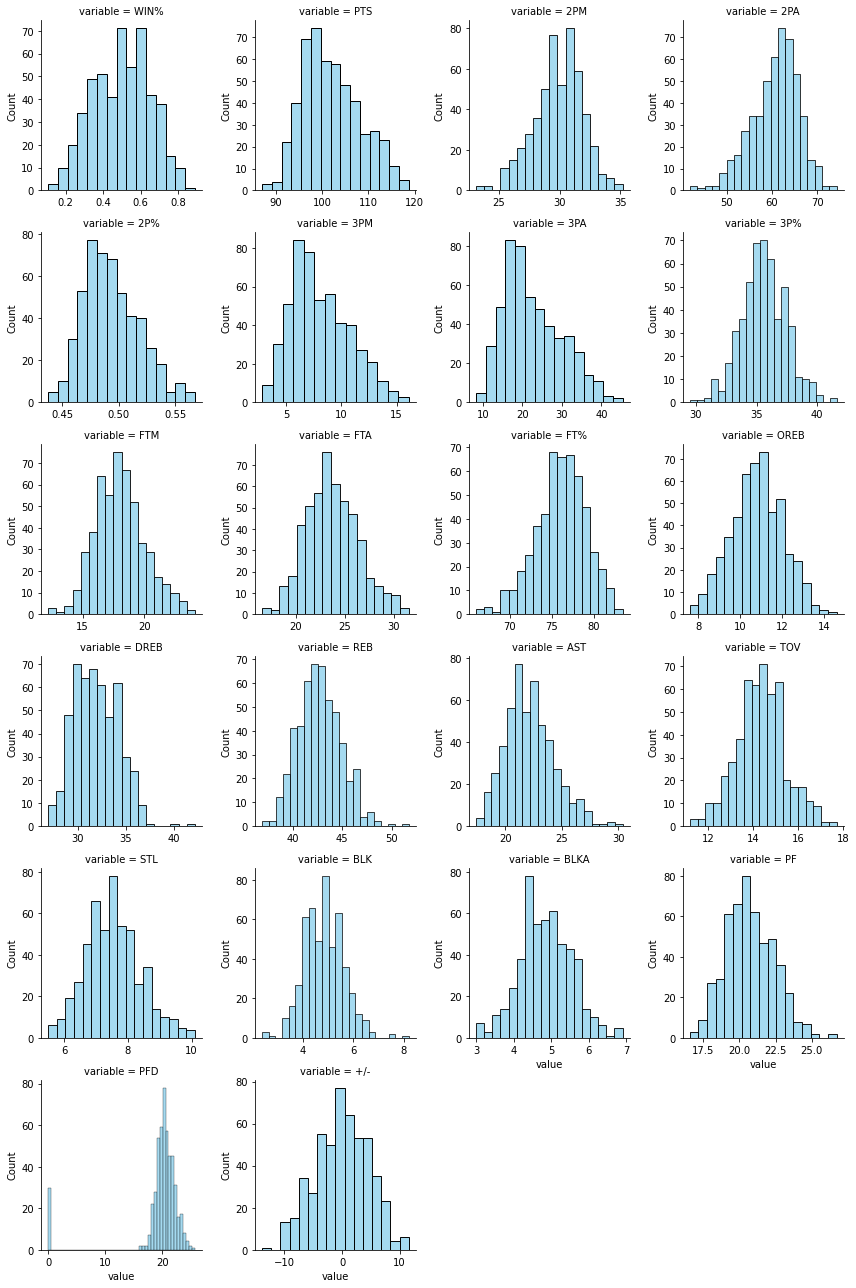

In [25]:
ans = sns.FacetGrid(data = melted_nba_stat_corr, col="variable",  col_wrap=4,sharey=False,sharex=False)
ans.map_dataframe(sns.histplot, x = 'value',color = 'skyblue');

In [26]:
nba_stat_cut=nba_stat[['TEAM', 'WIN%', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','REB', 'AST','BLK', 'BLKA', 'PF', 'PFD', '+/-']]

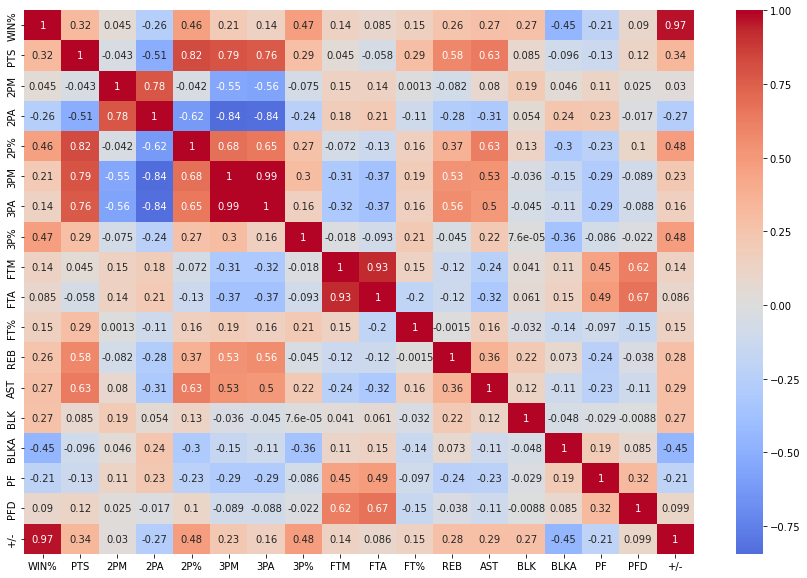

In [27]:
corrs = nba_stat_cut.corr(method = 'spearman')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

 ## מפת קורלציות מצומצמת מסקנה 1

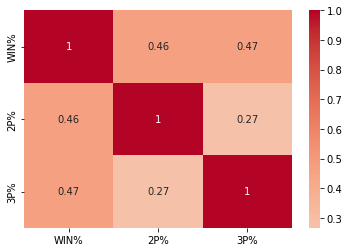

In [28]:
corrs = nba_stat[['WIN%','2P%','3P%']].corr(method = 'spearman')
plt.figure(figsize=(6,4)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

היינו מצפים שיהיה מתאם יותר גבוה בין קליעה לנצחון ככל שהקליעה שווה יותר נקודות. אבל להפתעתנו רואים כי דווקא יש מתאם דומה בין אחוזי קליעה לשתיים ונצחונות, לבין אחוזי קליעה לשלוש ונצחונות.
מעניין לבדוק אם יש שינוי בין תקופות בליגה.

##### בדיקה איזה תקופות דומות 

<AxesSubplot:>

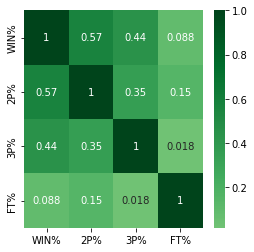

In [29]:
nba_2004=nba_stat[(nba_stat['SEASON']=='2004-05')] 
corrs = nba_2004[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

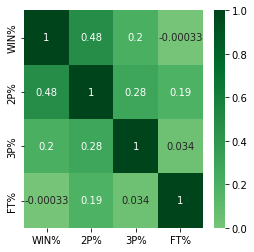

In [30]:
nba_2005=nba_stat[(nba_stat['SEASON']=='2005-06')] 
corrs = nba_2005[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

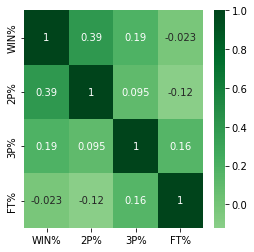

In [31]:
nba_2006=nba_stat[(nba_stat['SEASON']=='2006-07')] 
corrs = nba_2006[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

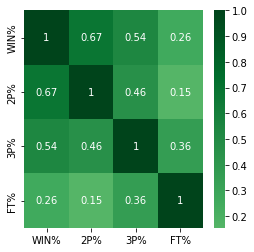

In [32]:
nba_2007=nba_stat[(nba_stat['SEASON']=='2007-08')] 
corrs = nba_2007[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

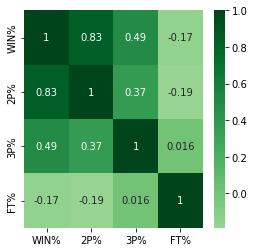

In [33]:
nba_2008=nba_stat[(nba_stat['SEASON']=='2008-09')] 
corrs = nba_2008[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

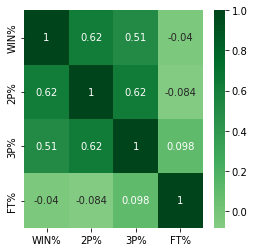

In [34]:
nba_2009=nba_stat[(nba_stat['SEASON']=='2009-10')]
corrs = nba_2009[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

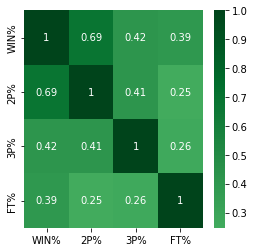

In [35]:
nba_2010=nba_stat[(nba_stat['SEASON']=='2010-11')] 
corrs = nba_2010[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

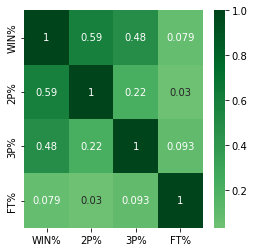

In [36]:
nba_2011=nba_stat[(nba_stat['SEASON']=='2011-12')] 
corrs = nba_2011[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

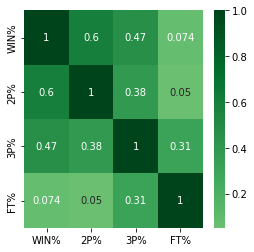

In [37]:
nba_2012=nba_stat[(nba_stat['SEASON']=='2012-13')] 
corrs = nba_2012[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

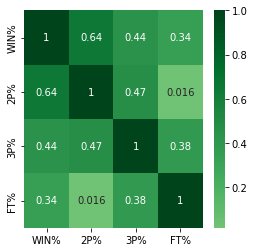

In [38]:
nba_2013=nba_stat[(nba_stat['SEASON']=='2013-14')] 
corrs = nba_2013[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

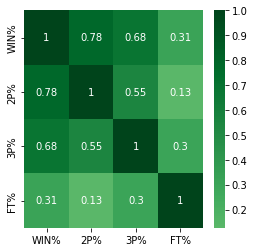

In [39]:
nba_2014=nba_stat[(nba_stat['SEASON']=='2014-15')] 
corrs = nba_2014[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

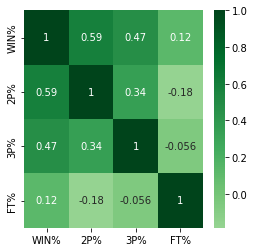

In [40]:
nba_2015=nba_stat[(nba_stat['SEASON']=='2015-16')] 
corrs = nba_2015[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

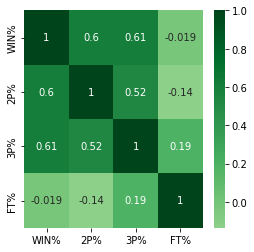

In [41]:
nba_2016=nba_stat[(nba_stat['SEASON']=='2016-17')] 
corrs = nba_2016[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

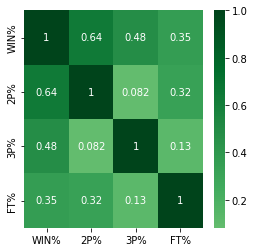

In [42]:
nba_2017=nba_stat[(nba_stat['SEASON']=='2017-18')] 
corrs = nba_2017[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

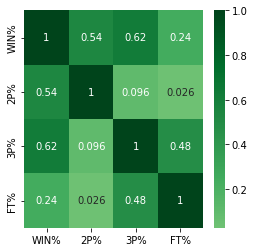

In [43]:
nba_2018=nba_stat[(nba_stat['SEASON']=='2018-19')] 
corrs = nba_2018[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

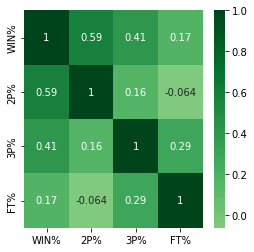

In [44]:
nba_2019=nba_stat[(nba_stat['SEASON']=='2019-20')] 
corrs = nba_2019[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

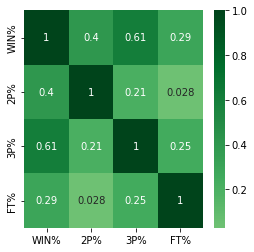

In [45]:
nba_2020=nba_stat[(nba_stat['SEASON']=='2020-21')] 
corrs = nba_2020[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

In [46]:
corr_2p_df = {'SEASON': ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'],'corr':[0.57,0.48,0.39,0.67,0.83,0.62,0.69,0.59,0.6,0.64,0.78,0.59,0.6,0.64,0.54,0.59,0.4]}
corr_2p_df = pd.DataFrame(data=corr_2p_df)

In [47]:
corr_3p_df = {'SEASON': ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'],'corr':[0.44,0.2,0.19,0.54,0.49,0.51,0.42,0.48,0.47,0.44,0.68,0.47,0.61,0.48,0.62,0.41,0.61]}
corr_3p_df = pd.DataFrame(data=corr_3p_df)

## גרף שמראה את השינוי בקורלציות בשנים

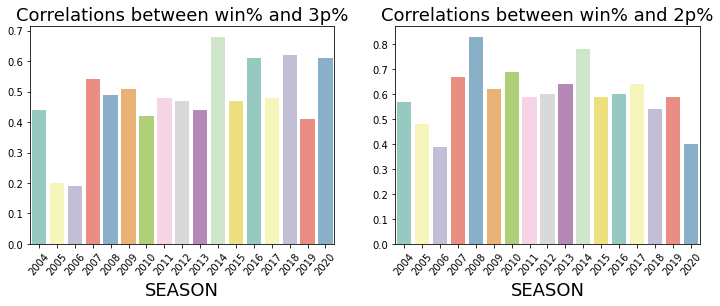

In [48]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].tick_params(axis='x', labelrotation=50)
axes[1].tick_params(axis='x', labelrotation=50)
sns.barplot(data=corr_3p_df,x='SEASON',y='corr',ax=axes[0],palette="Set3")
sns.barplot(data=corr_2p_df,x='SEASON',y='corr',ax=axes[1],palette="Set3")
axes[0].set_title("Correlations between win% and 3p%",fontsize=18)
axes[0].set_xlabel('SEASON',fontsize=18)
axes[0].set_ylabel("")
axes[1].set_title("Correlations between win% and 2p%",fontsize=18)
axes[1].set_xlabel('SEASON',fontsize=18)
axes[1].set_ylabel("")
plt.show()

##### התקופות המצומצמות שמהן נסיק את המסקנה

<AxesSubplot:>

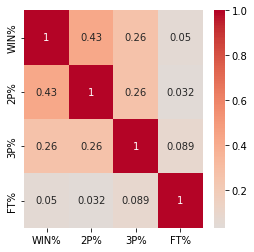

In [49]:
nba_to_2006=nba_stat[nba_stat['SEASON']<='2006-07']
corrs = nba_to_2006[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

<AxesSubplot:>

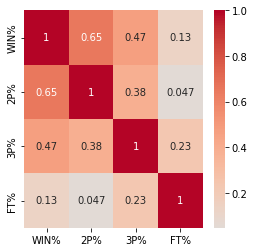

In [50]:
nba_from_2007_to_2013=nba_stat[(nba_stat['SEASON']>='2007-08') & (nba_stat['SEASON']<='2013-14')]
corrs = nba_from_2007_to_2013[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

<AxesSubplot:>

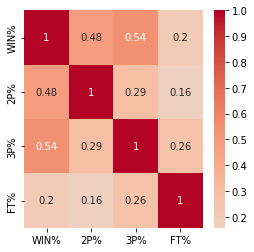

In [51]:
nba_from_2014=nba_stat[(nba_stat['SEASON']>='2014-15')]
corrs = nba_from_2014[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

In [52]:
corr_df = {'Priod':['2004-2006','2007-2013','2014-2020'],'3p_corr':[0.26,0.47,0.54],'2p_corr':[0.43,0.65,0.48]}
corr_df = pd.DataFrame(data=corr_df)
corr_df

,Priod,3p_corr,2p_corr
0,2004-2006,0.26,0.43
1,2007-2013,0.47,0.65
2,2014-2020,0.54,0.48


## גרף להצגה מסקנה 1

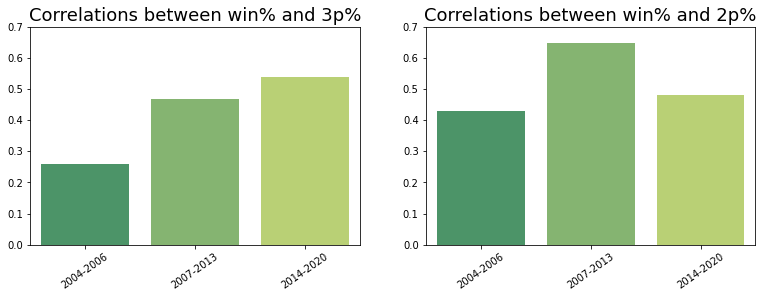

In [53]:
fig, axes = plt.subplots(1,2,figsize=(13,4))
axes[0].tick_params(axis='x', labelrotation=35)
axes[1].tick_params(axis='x', labelrotation=35)
sns.barplot(data=corr_df,x='Priod',y='3p_corr',ax=axes[0],palette='summer')
axes[0].set(ylim=(0, 0.7))
axes[0].set_title("Correlations between win% and 3p%",fontsize=18)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
sns.barplot(data=corr_df,x='Priod',y='2p_corr',ax=axes[1],palette='summer')
axes[1].set(ylim=(0, 0.7))
axes[1].set_title("Correlations between win% and 2p%",fontsize=18)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
plt.show()

בגרף האחוזים לשלוש ניתן לראות כי עם השנים המתאם בין אחוזי ניצחונות לאחוזי קליעה לשלוש גדל.

מנגד- ניתן לראות כי בגרף האחוזים לשתיים יש מגמות של עליה וירידה אבל לא מגמות ברורות שאפשר לנתח אותן.. 

## מסקנה 2 

נחפש שינויים שקורים בקטגוריות מסוימות בדאטה עם השנים, לראות מגמות שהכדורסל האמריקאי הולך אליהן.

In [54]:
features = ['SEASON','PTS', '2PM','2PA', '2P%', '3PM',
        '3PA', '3P%','FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']
melt_nba_stat= pd.melt(nba_stat[features], id_vars = 'SEASON', value_vars = features)

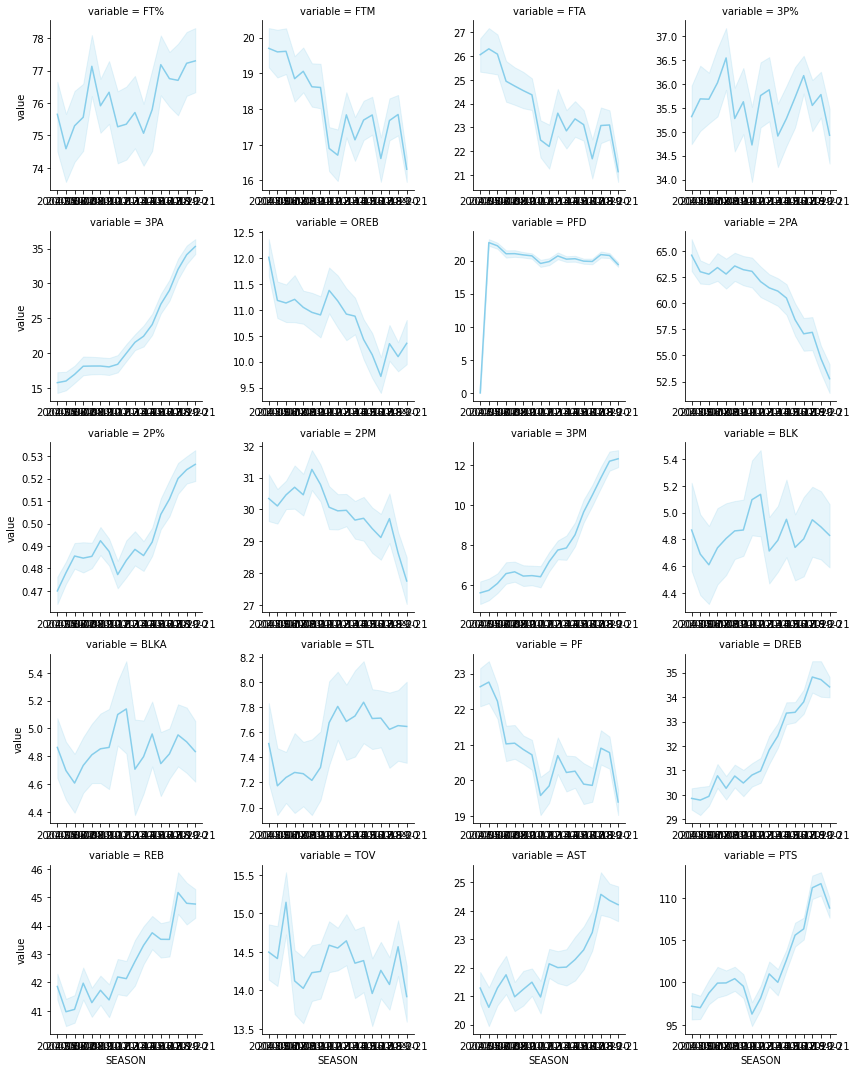

In [55]:
ans = sns.FacetGrid(data = melt_nba_stat.sort_values('SEASON'), col="variable",col_wrap=4,sharey=False,sharex=False)
ans.map_dataframe(sns.lineplot,x='SEASON', y = 'value',color='skyblue');

ניתן לראות כי ישנם מדדים מסוימים שעולים ומדדים אחרים שיורדים. ננסה למצוא קו מנחה לאיזה מדדים משתנים לאיזה כיוון ולכן ניצור מדד התקפי ומדד הגנתי

In [56]:
nba_stat['def']=nba_stat['STL']+nba_stat['BLK']+nba_stat['PF']
nba_stat['off']=nba_stat['PTS']+nba_stat['2PM']+nba_stat['3PM']+nba_stat['AST']+nba_stat['FTM']

במדד ההתקפי- קליעות נקודות ואסיסטים פר עונה.

במדד ההגנתי-חטיפות, חסימות, ועבירות שמראות על אגרסיביות של הקבוצה בהגנה.

## גרף להצגת מסקנה 2

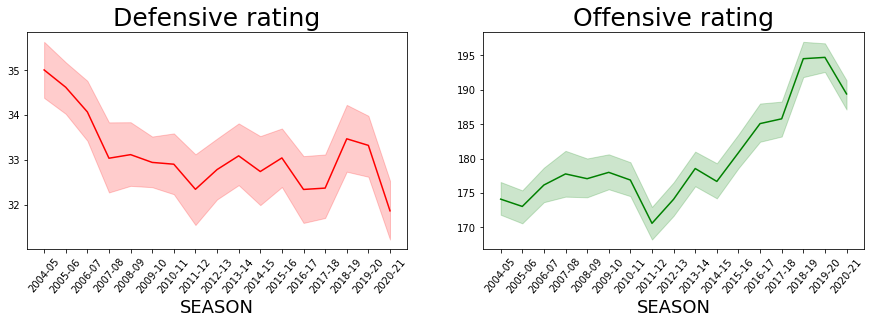

In [57]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.lineplot(data=nba_stat.sort_values('SEASON'),x='SEASON',y='def',ax=axes[0],color='red')
sns.lineplot(data=nba_stat.sort_values('SEASON'),x='SEASON',y='off',ax=axes[1],color='green')
axes[0].tick_params(axis='x', labelrotation=50)
axes[1].tick_params(axis='x', labelrotation=50)
axes[1].set_title("Offensive rating",fontsize=25)
axes[0].set_title("Defensive rating",fontsize=25)
axes[0].set_ylabel("")
axes[0].set_xlabel('SEASON',fontsize=18)
axes[1].set_ylabel("")
axes[1].set_xlabel('SEASON',fontsize=18)
plt.show()

ניתן לראות כי לאורך השנים קיימת עליה משמעותית במדד ההתקפי, ולעומת זאת ירידה במדד ההגנתי.


## מסקנה 3

נחפש לראות האם יש קטגוריות מסויימות שמאפיינות את הקבוצות ברבעון העליון של הנצחונות בליגה

In [58]:
nba_stat['WIN%'].describe()

count    510.000000
mean       0.499729
std        0.152183
min        0.106000
25%        0.390000
50%        0.512000
75%        0.610000
max        0.890000
Name: WIN%, dtype: float64

In [59]:
len(nba_stat[nba_stat['WIN%']>0.61])

125

In [60]:
nba_stat['throw']=nba_stat['2PA']+nba_stat['3PA']+nba_stat['FTA']
nba_stat['more posetion']=nba_stat['OREB']+nba_stat['STL']-nba_stat['TOV']

In [61]:
best_teams = nba_stat[nba_stat['WIN%']>=0.61].copy()
loser= nba_stat[nba_stat['WIN%']<0.61].copy()

In [62]:
#best_teams = nba_stat[nba_stat['End_place']<9].copy()
#loser= nba_stat[nba_stat['End_place']>=9].copy()

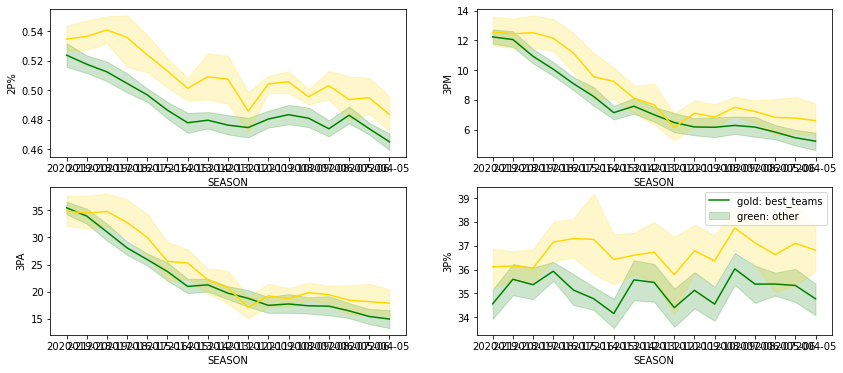

In [63]:
fig, ax= plt.subplots(2,2,figsize=(14, 6))
sns.lineplot(data=loser,x='SEASON',y='2P%',ax=ax[0,0],color='green')
sns.lineplot(data=best_teams,x='SEASON',y='2P%',ax=ax[0,0],color='gold')
sns.lineplot(data=loser,x='SEASON',y='3PM',ax=ax[0,1],color='green')
sns.lineplot(data=best_teams,x='SEASON',y='3PM',ax=ax[0,1],color='gold')
sns.lineplot(data=loser,x='SEASON',y='3PA',ax=ax[1,0],color='green')
sns.lineplot(data=best_teams,x='SEASON',y='3PA',ax=ax[1,0],color='gold')
sns.lineplot(data=loser,x='SEASON',y='3P%',ax=ax[1,1],color='green')
sns.lineplot(data=best_teams,x='SEASON',y='3P%',ax=ax[1,1],color='gold')
plt.legend(['gold: best_teams','green: other'])
plt.show()

In [64]:
#corrs = best_teams[['TEAM', 'WIN%', 'PTS', '2PM',
       #'2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','REB', 'AST','BLK', 'BLKA',
        #'PF', 'PFD', '+/-','def','off']].corr(method = 'spearman')
#plt.figure(figsize=(15,10)) 
#sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

שני הנתונים האלה הם היחידם שמקיימים קורלציה גבוהה עם אחוזי הנצחונות , ברביע העליון של הקבוצות הטובות

In [65]:
#Q_time=nba_stat[nba_stat.SEASON=='2019-20']
#other=nba_stat[nba_stat.SEASON!='2019-20']
#Q_time[['PTS','REB', 'AST','def','off','2PM','2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%']].mean()

In [66]:
#other[['PTS','REB', 'AST','def','off','2PM','2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%']].mean()

## predict

ננסה לבנות קטגוריות חדשות בדאטה כדי לעשות ניבוי על פיהן

In [67]:
nba_stat.columns

Index(['TEAM', 'W', 'L', 'WIN%', 'PTS', '2PM', '2PA', '2P%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'SEASON', 'End_place', 'def', 'off',
       'throw', 'more posetion'],
      dtype='object')

In [68]:
nba_stat=nba_stat.copy()
nba_stat['place']=0
for row in range(len(nba_stat)):
    if nba_stat['End_place'].iloc[row]<5:
        nba_stat['place'].iloc[row]='Competitor to the championship'
    elif nba_stat['End_place'].iloc[row]>=5 and nba_stat['End_place'].iloc[row]<=16:
        nba_stat['place'].iloc[row]='Playoff team'
    else:
        nba_stat['place'].iloc[row]='not Playoff team'

C:\Users\owner\AppData\Local\Temp\ipykernel_20248\1942849633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_stat['place'].iloc[row]='Competitor to the championship'


In [69]:
W_W=nba_stat[nba_stat.TEAM=='Washington Wizards']

In [78]:
#features = 'TEAM', 'W', 'L', 'WIN%', 'PTS', '2PM', '2PA', '2P%', '3PM', '3PA',
       #'3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       #'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'SEASON', 'End_place', 'def', 'off',
       #'throw', 'more posetion'
features = ['off','more posetion'] 
X = W_W[features] 
y = W_W['WIN%'] 

### Classifier

In [71]:
#X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=15) 
#my_model = DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=15)
#my_model.fit(X_train, y_train)
#prediction = my_model.predict(X_test)
#acc = sk.metrics.accuracy_score(prediction,y_test)
#acc

In [72]:
#def get_acc(max_depth, train_X, test_X, train_y, test_y):
   # model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=15)
    #model.fit(train_X, train_y)
    #preds_val = model.predict(test_X)
    #acc = sk.metrics.accuracy_score(preds_val, test_y)
    #return(acc)

In [74]:
#for max_depth in [1, 2, 3, 4, 5,7,9,13,17,25,30]:
#    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
#    print(max_depth, my_acc)

### Regressor

In [81]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42) 
my_model = DecisionTreeRegressor(max_depth=5,random_state=42)
my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)

In [82]:
print("Making predictions all test teams:")
print(y_test)

print("The predictions are")
#prediction = my_model.predict(X_test)
print(prediction)

print("MSE: {:.3f}".format(mean_squared_error(prediction,y_test,squared=False)))

Making predictions all test teams:
19     0.462
52     0.347
167    0.500
462    0.512
356    0.317
434    0.500
Name: WIN%, dtype: float64
The predictions are
[0.561      0.39       0.52833333 0.52833333 0.354      0.52833333]
MSE: 0.050


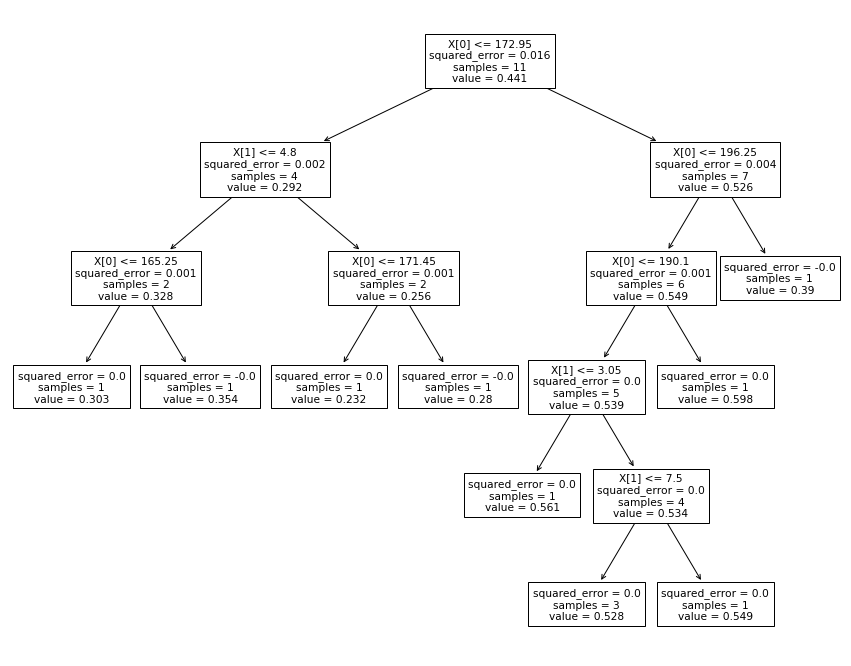

In [83]:
plt.figure(figsize=(15,12)) 
tree.plot_tree(my_model);